In [23]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from cnn_from_scratch import loss_function
reload(loss_function)
from cnn_from_scratch import neuron
reload(neuron)
from cnn_from_scratch import layer
reload(layer)
from cnn_from_scratch import model
reload(model)
from cnn_from_scratch import datasets
reload(datasets)
from cnn_from_scratch.model import CNN_Model
from cnn_from_scratch.layer import DenseLayer
from cnn_from_scratch.loss_function import LogLoss
from cnn_from_scratch.datasets import load_mnist, show_mnist_digit
# Only flow check now.

x_train, y_train, x_test, y_test = load_mnist()
print(x_train.shape, y_train.shape)


(60000, 784) (60000, 10)


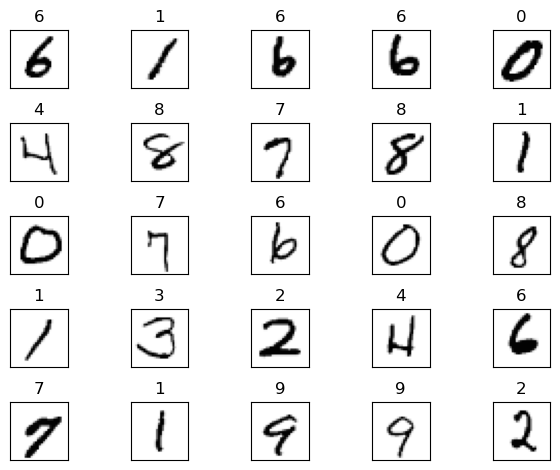

In [28]:
plt.ion()
fig, axs = plt.subplots(5, 5)
idxs = np.random.randint(len(x_train), size=25)
for q in range(25):
    i, j = q // 5, q % 5
    show_mnist_digit(x_train[idxs[q]], y_train[idxs[q]], axs[i, j])
fig.tight_layout()

# CNN_trainer HelloWorld: 0/300000 Step - Train loss = 0.682; Test loss = 0.681 - 22:33:22
# CNN_trainer HelloWorld: 10000/300000 Step - Train loss = 0.562; Test loss = 0.561 - 22:34:26
# CNN_trainer HelloWorld: 20000/300000 Step - Train loss = 0.480; Test loss = 0.480 - 22:35:30
# CNN_trainer HelloWorld: 30000/300000 Step - Train loss = 0.427; Test loss = 0.427 - 22:36:35
# CNN_trainer HelloWorld: 40000/300000 Step - Train loss = 0.393; Test loss = 0.393 - 22:37:38
# CNN_trainer HelloWorld: 50000/300000 Step - Train loss = 0.371; Test loss = 0.370 - 22:38:43
# CNN_trainer HelloWorld: 60000/300000 Step - Train loss = 0.356; Test loss = 0.356 - 22:39:47
# CNN_trainer HelloWorld: 70000/300000 Step - Train loss = 0.347; Test loss = 0.347 - 22:40:52
# CNN_trainer HelloWorld: 80000/300000 Step - Train loss = 0.340; Test loss = 0.340 - 22:41:57
# CNN_trainer HelloWorld: 90000/300000 Step - Train loss = 0.336; Test loss = 0.336 - 22:43:02
# CNN_trainer HelloWorld: 100000/300000 Step - Train l

/Users/idchiang/working/cnn_from_scratch/cnn_from_scratch/trainer.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.set_title(self.model.name)


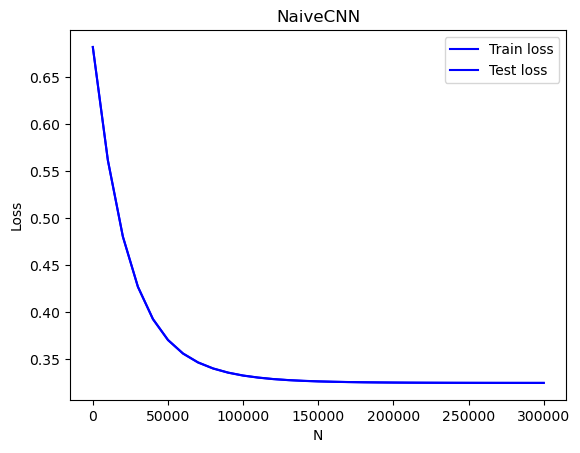

In [3]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from cnn_from_scratch import loss_function
reload(loss_function)
from cnn_from_scratch import neuron
reload(neuron)
from cnn_from_scratch import layer
reload(layer)
from cnn_from_scratch import model
reload(model)
from cnn_from_scratch import datasets
reload(datasets)
from cnn_from_scratch.datasets import load_mnist, show_mnist_digit
from cnn_from_scratch.trainer import CNN_trainer
# Only flow check now.

x_train, y_train, x_test, y_test = load_mnist()
cnn_trainer = CNN_trainer(loss_func=None, name='HelloWorld')
cnn_trainer.naive_model(x_train.shape[1], 10, hidden_dims=[270, 90, 30], learning_rate=1e-2)
cnn_trainer.set_data(x_train, y_train, x_test, y_test)
cnn_trainer.train_model(N=300000, batch=100, N_print=10000)

# update: learning_rate should really be an input in train_model()...
# update: should have the .save_trainer(), .load_trainer() methods.

# filename = '/Users/idchiang/working/cnn_from_scratch/model/naive_cnn_20240912.pkl'

In [2]:
from cnn_from_scratch.datasets import mnist_model_examination
print(len(x_train))
# mnist_model_examination(cnn_trainer, x_test, y_test)

NameError: name 'x_train' is not defined

In [3]:
import numpy as np
y = np.array([[0,1,0], [1,0,0]])
y_true = np.argmax(y, axis=1)
y_pred = [1, 1]
np.sum(y_true == y_pred) / len(y_true)

0.5

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Flatten the images for MLP
X_mlp_train = X_train.reshape(X_train.shape[0], -1)
X_mlp_test = X_test.reshape(X_test.shape[0], -1)

# Train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1)  # batch_size = 200 by default

mlp.fit(X_mlp_train, y_train.argmax(axis=1))

# Predict and evaluate
y_mlp_pred = mlp.predict(X_mlp_test)
mlp_accuracy = accuracy_score(y_test.argmax(axis=1), y_mlp_pred)
print(f"MLPClassifier Accuracy: {mlp_accuracy * 100:.2f}%")

final_loss = mlp.loss_
loss_curve = mlp.loss_curve_

# Partial fit stuff 
for iteration in range(n_iterations):
    for step in range(steps_per_epoch):
        # Get the current mini-batch
        start_idx = step * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        
        # Incrementally fit the model using the current batch
        mlp.partial_fit(X_batch, np.argmax(y_batch, axis=1), classes=classes)
        
        # Track the train loss
        train_loss_curve.append(mlp.loss_)
        
        # Every 10 * batch_size steps, calculate test loss and accuracy
        if step % 10 == 0:
            # Predict on the test set and calculate test loss and accuracy
            y_test_pred = mlp.predict_proba(X_test)  # Use predict_proba to get probabilities
            test_loss = log_loss(y_test, y_test_pred)
            test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
            
            test_loss_curve.append(test_loss)
            test_accuracy_curve.append(test_accuracy)